In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plot
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

2023-05-15 20:39:55.062260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
# Study data files

diabetes_binary_health_path = "Ressources/diabetes_binary_health_indicators_BRFSS2015.csv"


# Read the  data and the study results
df_diabetes = pd.read_csv(diabetes_binary_health_path)

# Severe_Housing_Cost_Burden_Percent = pd.read_csv(Severe_Housing_Cost_Burden_Percent_path)
# display(Food_Insecurity)
# Severe_Housing_Cost_Burden_Percent_path.head()
# No_Health_Insurance
df_diabetes


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [35]:
# df_diabetes = pd.get_dummies(df_diabetes)
                                                        

# df_diabetes


In [36]:
df_diabetes.shape

(253680, 22)

In [37]:
# df_diabetes.dtypes

In [38]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [39]:
df_diabetes.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [40]:
df_diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [41]:
# df_diabetes.isna(). sum()

In [42]:
df_diabetes[['Diabetes_binary']].value_counts()

Diabetes_binary
0                  218334
1                   35346
dtype: int64

In [43]:
# df_diabetes.duplicated()/df_diabetes.loc[df_diabetes.duplicated()]

In [44]:
# df_diabetes

In [45]:
# feature understanding


In [46]:
# # Create a new column with the combination of BMI, Age, and Income
# top_10_combinations['BMI_Age_Income'] = top_10_combinations.apply(lambda row: f"{row['BMI']}-{row['Age']}-{row['Income']}", axis=1)

# # Create a bar chart of the top 10 most frequent combinations of values
# ax = top_10_combinations.plot(x='BMI_Age_Income', y='count', kind='bar', title='Top 10 Most Frequent Combinations of BMI, Age, and Income', color=colors)

# # Set the x-label and y-label of the chart
# ax.set_xlabel('Combination of BMI, Age, and Income')
# ax.set_ylabel('Count')

# plt.show()
# df_diabetes['BMI_Age_Income'] = df_diabetes.apply(lambda row: f"{row['BMI']}-{row['Age']}-{row['Income']}", axis=1)

# # Create a bar chart of the top 10 most frequent combinations of values
# ax = df_diabetes.plot(x='BMI_Age_Income', y='count', kind='bar', title='Top 10 Most Frequent Combinations of BMI, Age, and Income')

# # Set the x-label and y-label of the chart
# ax.set_xlabel('Combination of BMI, Age, and Income')
# ax.set_ylabel('Count')

# plt.show()

In [47]:
# df_diabetes[['Diabetes_binary']].plot(kind='bar')

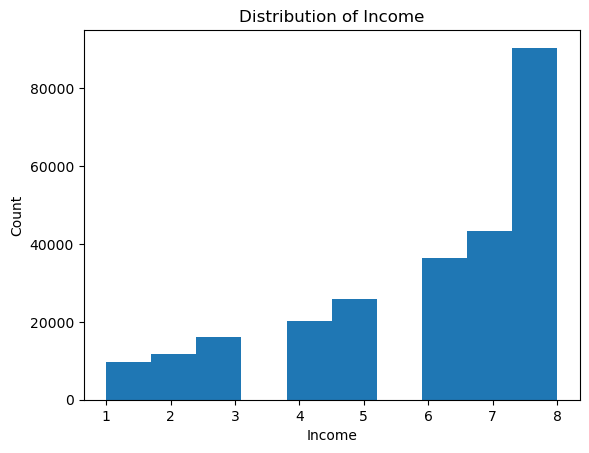

In [48]:

plt.hist(df_diabetes['Income'], bins=10)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

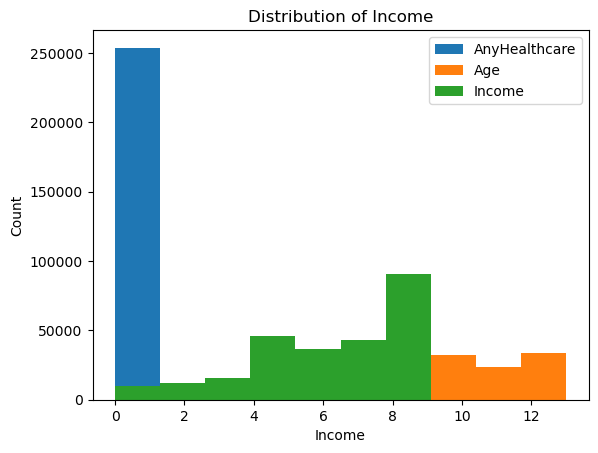

In [49]:
# Plot a histogram of 'Income' column in df_diabetes
df_diabetes[['AnyHealthcare', 'Age', 'Income']].plot(kind='hist')
plt.title('Distribution of Income')
plt.xlabel('Income')
# hue='Income',
plt.ylabel('Count')
plt.show()


In [50]:
# # Create a scatter plot of 'AnyHealthcare' vs. 'Stroke'
# sns.scatterplot(x='AnyHealthcare', y='Income', hue='Income', data=df_diabetes)
# plt.title('Relationship between AnyHealthcare and Stroke with Income')
# plt.show()

In [51]:
# feature relationship

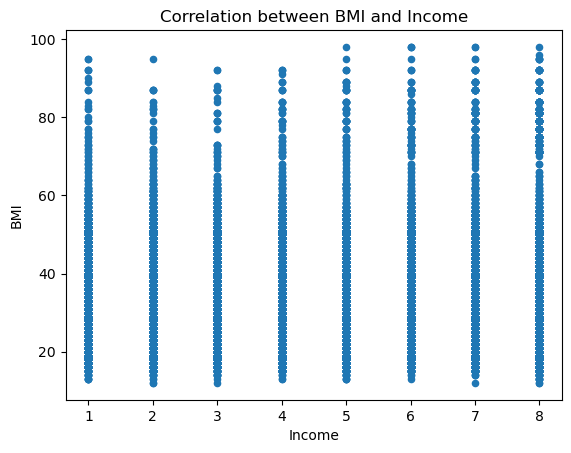

In [52]:
# define color


df_diabetes.plot(kind='scatter',
                  x='Income',
                  y='BMI', 
#   c=['#1f77b4', '#ff7f0e'],
                  title='Correlation between BMI and Income'
                 )
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

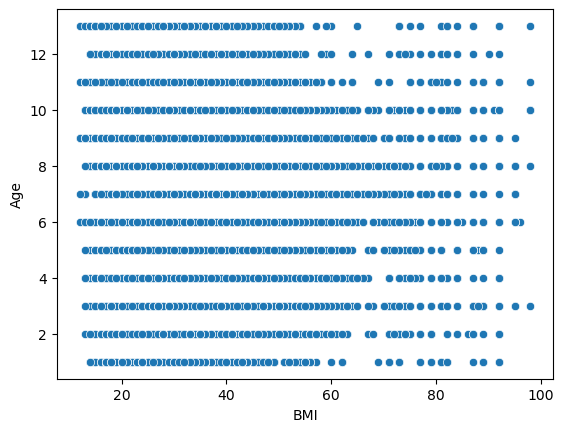

In [53]:
sns.scatterplot(
        x='BMI',
        y='Age',
#         hue='BMI',
        data=df_diabetes
)

plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

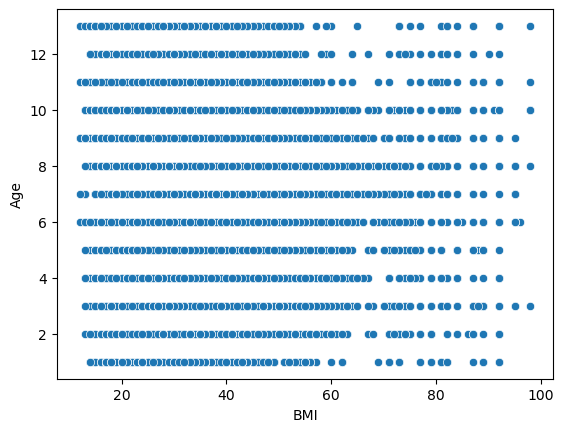

In [54]:
sns.scatterplot(
        x='BMI',
        y='Age',
#         hue='BMI',
        data=df_diabetes
)

plot.show

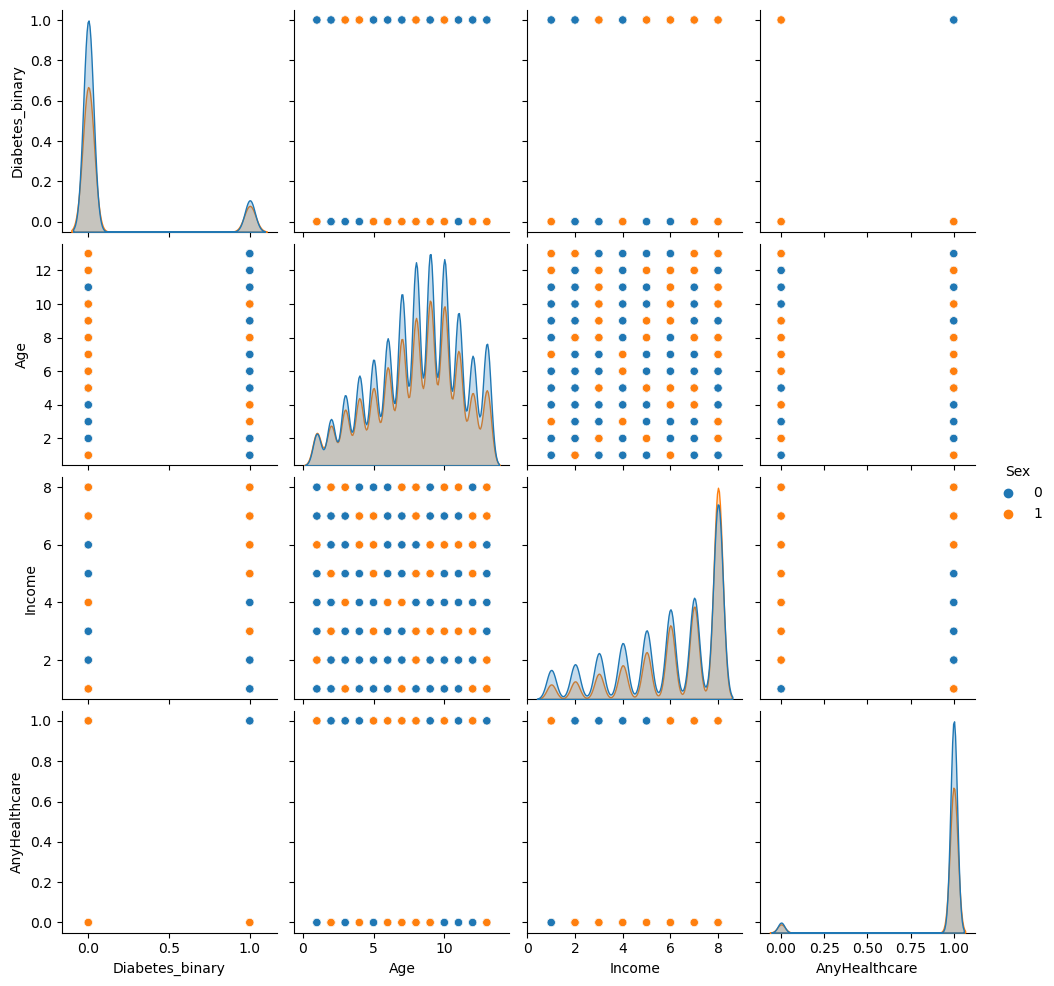

In [55]:

sns.pairplot(df_diabetes, vars=['Diabetes_binary', 'Age', 'Income', 'AnyHealthcare'], hue='Sex')
plt.show()

In [56]:
df_diabetes_corr = df_diabetes[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].dropna().corr()

df_diabetes_corr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


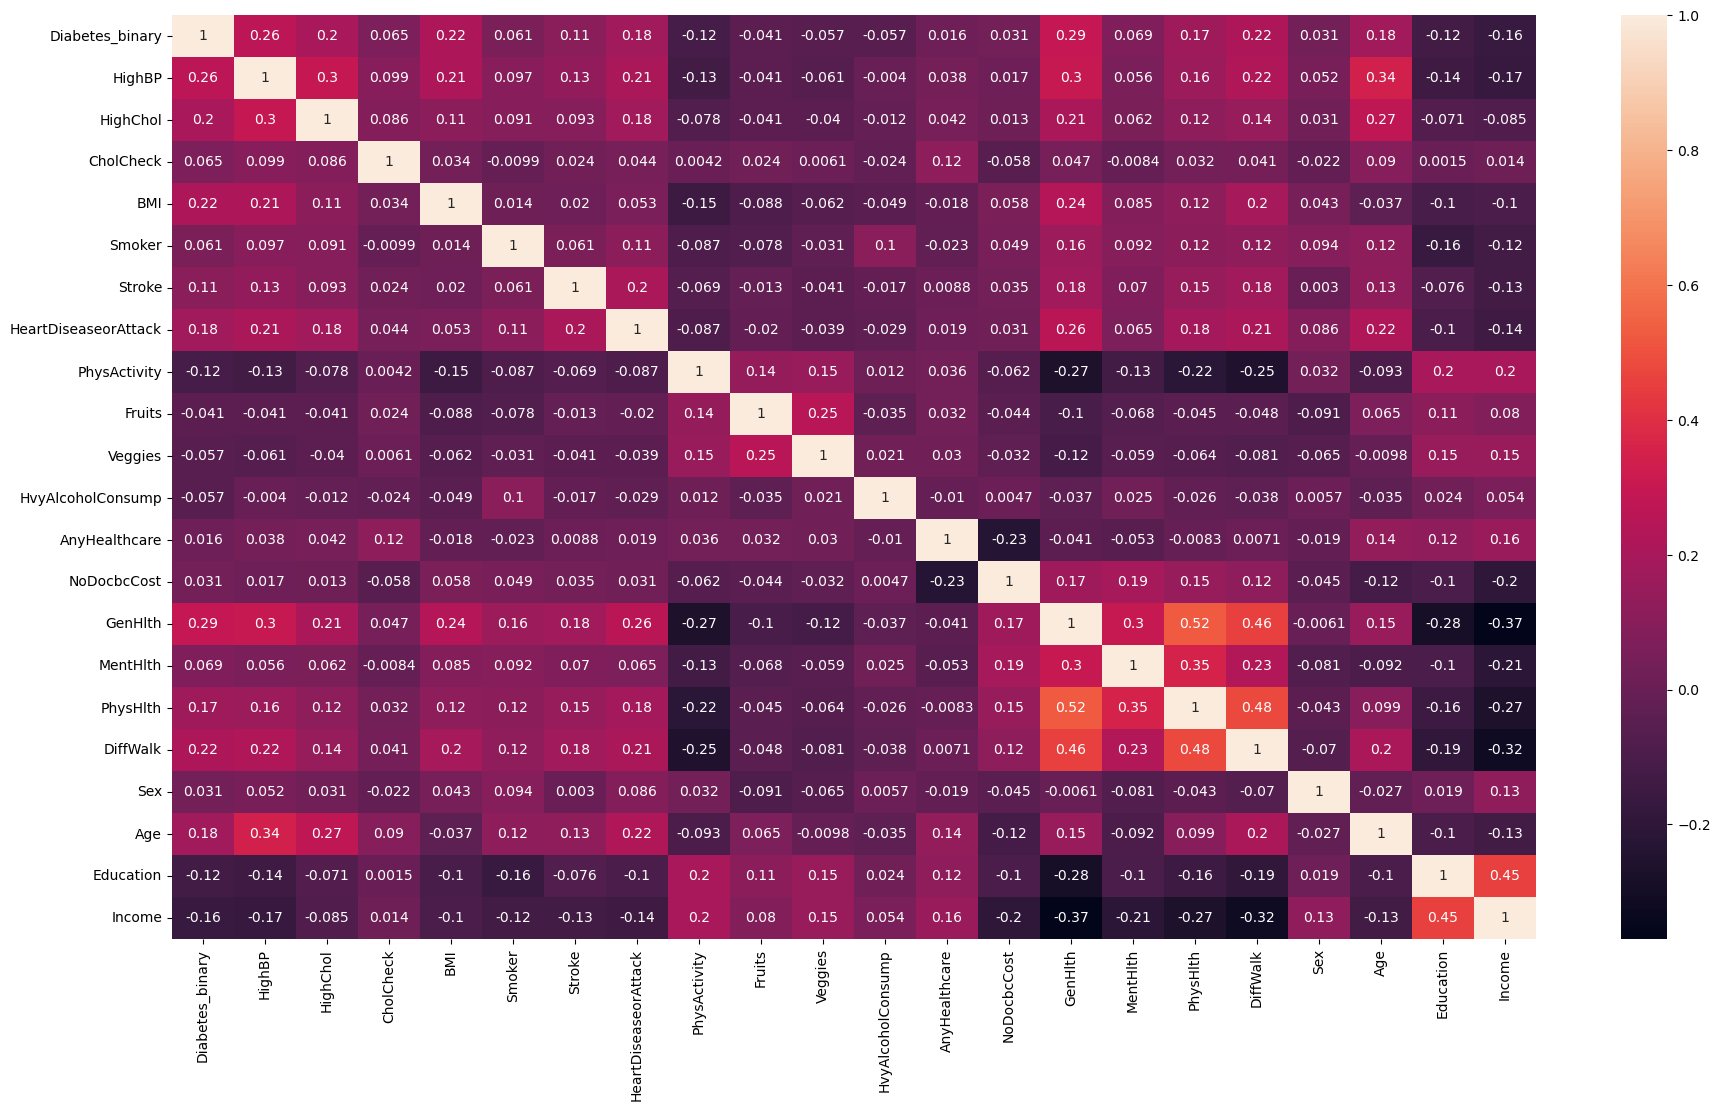

In [57]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(df_diabetes_corr, annot=True, ax=ax)
plt.show()

In [58]:
# select our model

In [59]:
# split our preprocessed data from our features

X = df_diabetes.drop(["Diabetes_binary"], axis='columns').values
y = df_diabetes["Diabetes_binary"].values

# split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [60]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# compile train and evaluate ther model

In [80]:
number_input_features = len(X_train[0])

hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 24
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# train the model
# fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Check the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                704       
                                                                 
 dense_7 (Dense)             (None, 24)                792       
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [81]:
# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [82]:
# train the model
# epochs = 50
# history = fit_model = model.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3191 - accuracy: 0.8648
Epoch 2/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3134 - accuracy: 0.8663
Epoch 3/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3127 - accuracy: 0.8666
Epoch 4/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3122 - accuracy: 0.8670
Epoch 5/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3118 - accuracy: 0.8672
Epoch 6/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3114 - accuracy: 0.8676
Epoch 7/50
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3112 - accuracy: 0.8672
Epoch 8/50
5946/5946 [==============================] - 8s 1ms/step - loss: 0.3109 - accuracy: 0.8676
Epoch 9/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3106 - accuracy: 0.8680
Epoch 10/50
5946/5946 [==============================] - 8s 1ms/step - loss: 0.310

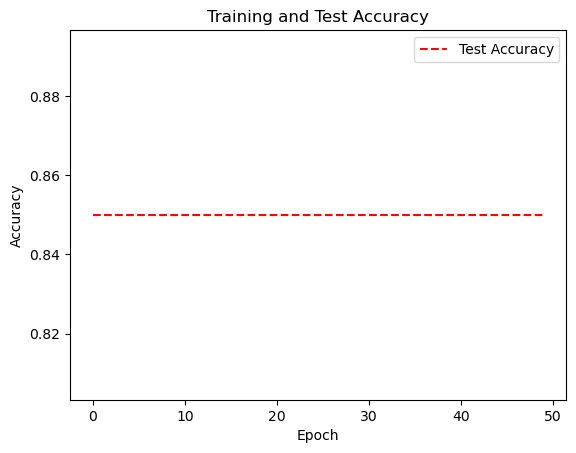

In [83]:
# Assuming you have the following variables:
epochs = 50
history = {}  # Contains training accuracy values
test_accuracy = 0.85  # Test accuracy value

# Plotting the training accuracy and test accuracy
plt.plothistory = fit_model = model.fit(X_train_scaled,y_train,epochs=50)
plt.plot([0, epochs - 1], [test_accuracy] * 2, 'r--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()
